In [1]:
def show_Predicted_Probability(y,prediction,
                               x_img,Predicted_Probability,i):
    print('label:',label_dict[y[i][0]],
          'predict:',label_dict[prediction[i]])
    plt.figure(figsize=(2,2))
    plt.imshow(np.reshape(x_img_test[i],(32, 32,3)))
    plt.show()
    for j in range(10):
        print(label_dict[j]+
              ' Probability:%1.9f'%(Predicted_Probability[i][j]))

In [2]:
def plot_images_labels_prediction(images,labels,prediction,
                                  idx,num=25):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx],cmap='binary')
                
        title=str(i)+','+label_dict[labels[i][0]]
        if len(prediction)>0:
            title+='=>'+label_dict[prediction[i]]
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

In [3]:
import numpy
from keras.datasets import cifar10
import numpy as np
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D,BatchNormalization
np.random.seed(10)
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)

D:\ac\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train.history[train_acc])
    plt.plot(train.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [5]:
def show_train_loss(train_acc,test_acc):
    plt.plot(train.history[train_acc])
    plt.plot(train.history[test_acc])
    plt.title('Train History')
    plt.ylabel('loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [6]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3, 3),input_shape=(32, 32,3),
                 activation='relu', padding='same'))
model.add(Dropout(0.3))
model.add(Conv2D(filters=32, kernel_size=(3, 3),
                 activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3),
                 activation='relu', padding='same'))
model.add(Dropout(0.3))
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=128, kernel_size=(3, 3), 
                 activation='relu', padding='same'))
model.add(Dropout(0.3))
model.add(Conv2D(filters=128, kernel_size=(3, 3), 
                 activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(2500, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1500, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])
train=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.2,
                        epochs=10, batch_size=128, verbose=1)          

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 717s 18ms/step - loss: 1.7766 - acc: 0.3363 - val_loss: 1.4629 - val_acc: 0.4530
Epoch 2/10
40000/40000 [==============================] - 773s 19ms/step - loss: 1.3513 - acc: 0.5081 - val_loss: 1.2055 - val_acc: 0.5639
Epoch 3/10
40000/40000 [==============================] - 469s 12ms/step - loss: 1.1624 - acc: 0.5860 - val_loss: 1.0964 - val_acc: 0.6092
Epoch 4/10
40000/40000 [==============================] - 432s 11ms/step - loss: 1.0132 - acc: 0.6396 - val_loss: 0.9153 - val_acc: 0.6787
Epoch 5/10
40000/40000 [==============================] - 478s 12ms/step - loss: 0.9135 - acc: 0.6764 - val_loss: 0.8518 - val_acc: 0.7020
Epoch 6/10
40000/40000 [==============================] - 429s 11ms/step - loss: 0.8254 - acc: 0.7104 - val_loss: 0.8142 - val_acc: 0.7140
Epoch 7/10
40000/40000 [==============================] - 459s 11ms/step - loss: 0.7743 - acc: 0.7272 - val_loss: 0.

In [7]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        36928     
__________

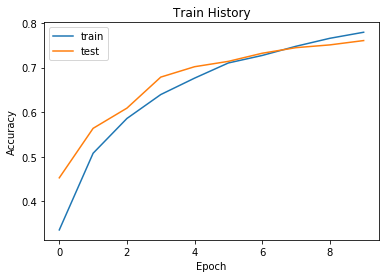

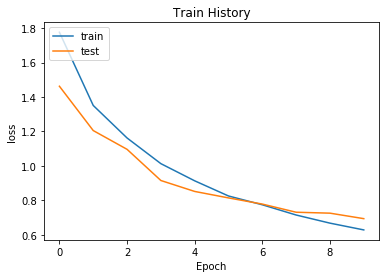

In [8]:
show_train_history('acc','val_acc')
show_train_loss('loss','val_loss')

In [9]:
scores = model.evaluate(x_img_test_normalize, 
                        y_label_test_OneHot, verbose=0)
scores[1]

0.7575

In [10]:
prediction=model.predict_classes(x_img_test_normalize)

In [11]:
prediction[:10]

array([3, 8, 8, 0, 6, 6, 9, 4, 3, 9], dtype=int64)

In [12]:
label_dict={0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",
            5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}

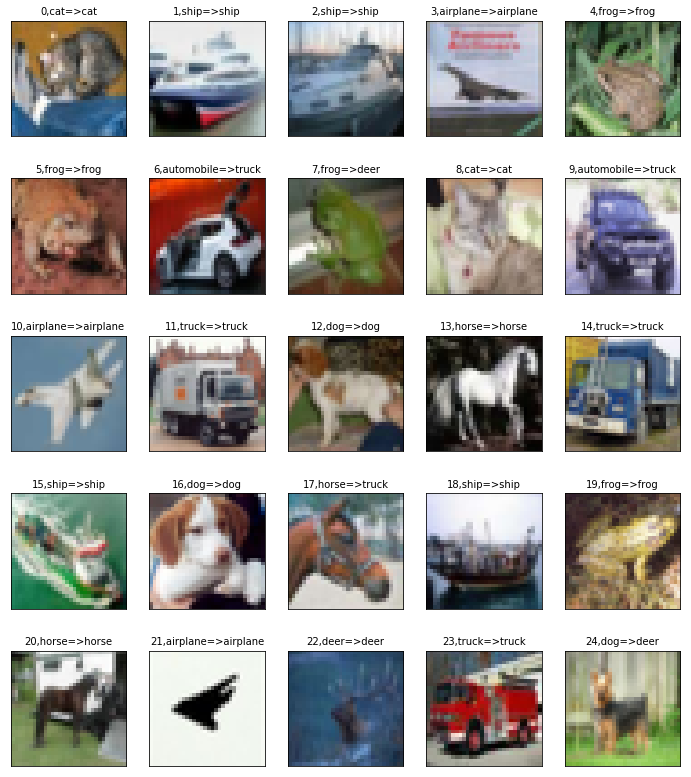

In [19]:
plot_images_labels_prediction(x_img_test,y_label_test,
                              prediction,0,25)

In [14]:
Predicted_Probability=model.predict(x_img_test_normalize)

label: dog predict: dog


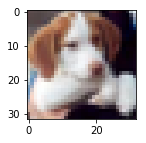

airplane Probability:0.000010733
automobile Probability:0.000004963
bird Probability:0.001982409
cat Probability:0.034944829
deer Probability:0.000008484
dog Probability:0.962549686
frog Probability:0.000021846
horse Probability:0.000440137
ship Probability:0.000010815
truck Probability:0.000026159


In [20]:
show_Predicted_Probability(y_label_test,prediction,
                           x_img_test,Predicted_Probability,16)

label: airplane predict: airplane


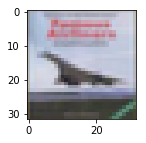

airplane Probability:0.514976025
automobile Probability:0.003536955
bird Probability:0.032044649
cat Probability:0.002369405
deer Probability:0.004068104
dog Probability:0.000364722
frog Probability:0.000307449
horse Probability:0.000721087
ship Probability:0.432581544
truck Probability:0.009030002


In [16]:
show_Predicted_Probability(y_label_test,prediction,
                           x_img_test,Predicted_Probability,3)

In [17]:
import pandas as pd
print(label_dict)
pd.crosstab(y_label_test.reshape(-1),prediction,
            rownames=['label'],colnames=['predict'])

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,727,13,49,10,17,2,6,13,130,33
1,8,866,4,6,4,4,2,2,26,78
2,46,0,652,36,147,30,33,31,18,7
3,15,0,86,501,106,136,73,44,16,23
4,9,2,38,24,784,23,21,88,10,1
5,15,0,59,106,78,631,23,69,12,7
6,6,2,40,33,78,18,802,5,11,5
7,8,0,39,28,39,33,1,838,3,11
8,27,12,19,2,8,2,3,7,909,11
